In [1]:
import numpy as np # 导入Numpy
import os # 导入os工具
print(os.listdir("./Dog/Images"))

['n02097658-silky_terrier', 'n02092002-Scottish_deerhound', 'n02099849-Chesapeake_Bay_retriever', 'n02091244-Ibizan_hound', 'n02095314-wire-haired_fox_terrier', 'n02091831-Saluki', 'n02102318-cocker_spaniel', 'n02104365-schipperke', 'n02090622-borzoi', 'n02113023-Pembroke', 'n02105505-komondor', 'n02093256-Staffordshire_bullterrier', 'n02113799-standard_poodle', 'n02109961-Eskimo_dog', 'n02089973-English_foxhound', 'n02099601-golden_retriever', 'n02095889-Sealyham_terrier', 'n02085782-Japanese_spaniel', 'n02097047-miniature_schnauzer', 'n02110063-malamute', 'n02105162-malinois', 'n02086079-Pekinese', 'n02097130-giant_schnauzer', 'n02113978-Mexican_hairless', 'n02107142-Doberman', 'n02097209-standard_schnauzer', 'n02115913-dhole', 'n02106662-German_shepherd', 'n02106382-Bouvier_des_Flandres', 'n02110185-Siberian_husky', 'n02094258-Norwich_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02109525-Saint_Bernard', 'n02093754-Border_terrier', 'n02105251-briard', 'n0210855

In [2]:
# 本示例咱只处理这10种狗吧
# dir = '../input/stanford-dogs-dataset/images/Images/'
dir = './Dog/Images/'
chihuahua_dir = dir+'n02085620-Chihuahua' #吉娃娃
japanese_spaniel_dir = dir+'n02085782-Japanese_spaniel' #日本狆
maltese_dir = dir+'n02085936-Maltese_dog' #马尔济斯犬
pekinese_dir = dir+'n02086079-Pekinese' #北京狮子狗
shitzu_dir = dir+'n02086240-Shih-Tzu' #西施犬
blenheim_spaniel_dir = dir+'n02086646-Blenheim_spaniel' #英国可卡犬
papillon_dir = dir+'n02086910-papillon' #蝴蝶犬
toy_terrier_dir = dir+'n02087046-toy_terrier' #玩具猎狐梗
afghan_hound_dir = dir+'n02088094-Afghan_hound' #阿富汗猎犬
basset_dir = dir+'n02088238-basset' #巴吉度猎犬

In [3]:
import numpy as np
a = np.arange(1,11)
np.__version__

'2.0.1'

In [4]:
from torchvision import transforms
import PIL.Image as Image

X = []
y_label = []
imgsize = 150
transform = transforms.Compose([
    transforms.Resize((imgsize, imgsize)),
    transforms.ToTensor()
])
# 定义一个函数读入狗狗图片
def training_data(label,data_dir):
    print ("正在读入：", data_dir)
    for img in os.listdir(data_dir):
        path = os.path.join(data_dir,img)
        img = Image.open(path).convert('RGB')
        img = transform(img)
        X.append(np.array(img))
        y_label.append(str(label)) 
# 读入10个目录中的狗狗图片
training_data('chihuahua',chihuahua_dir)
training_data('japanese_spaniel',japanese_spaniel_dir)
training_data('maltese',maltese_dir)
training_data('pekinese',pekinese_dir)
training_data('shitzu',shitzu_dir)
training_data('blenheim_spaniel',blenheim_spaniel_dir)
training_data('papillon',papillon_dir)
training_data('toy_terrier',toy_terrier_dir)
training_data('afghan_hound',afghan_hound_dir)
training_data('basset',basset_dir)

正在读入： ./Dog/Images/n02085620-Chihuahua
正在读入： ./Dog/Images/n02085782-Japanese_spaniel
正在读入： ./Dog/Images/n02085936-Maltese_dog
正在读入： ./Dog/Images/n02086079-Pekinese
正在读入： ./Dog/Images/n02086240-Shih-Tzu
正在读入： ./Dog/Images/n02086646-Blenheim_spaniel
正在读入： ./Dog/Images/n02086910-papillon
正在读入： ./Dog/Images/n02087046-toy_terrier
正在读入： ./Dog/Images/n02088094-Afghan_hound
正在读入： ./Dog/Images/n02088238-basset


In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# y = to_categorical(y,10) # 将标签转换为One-hot编码
y = LabelEncoder().fit_transform(y_label)
y = OneHotEncoder(sparse_output=False).fit_transform(y.reshape(-1,1))
y[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [6]:
X = np.array(X) # 将X从列表转换为张量数组、
X[0]

array([[[0.36862746, 0.3764706 , 0.35686275, ..., 0.45490196,
         0.58431375, 0.36862746],
        [0.36862746, 0.3764706 , 0.3647059 , ..., 0.5176471 ,
         0.5372549 , 0.33333334],
        [0.36862746, 0.38431373, 0.37254903, ..., 0.54901963,
         0.41568628, 0.3372549 ],
        ...,
        [0.99215686, 0.96862745, 0.92941177, ..., 0.49019608,
         0.36862746, 0.46666667],
        [0.99607843, 0.9764706 , 0.9529412 , ..., 0.45490196,
         0.5019608 , 0.48235294],
        [1.        , 0.9882353 , 0.9647059 , ..., 0.52156866,
         0.43529412, 0.44313726]],

       [[0.40784314, 0.41568628, 0.39607844, ..., 0.32156864,
         0.47843137, 0.35686275],
        [0.40392157, 0.41568628, 0.40392157, ..., 0.3882353 ,
         0.45490196, 0.34117648],
        [0.4       , 0.4117647 , 0.40392157, ..., 0.43529412,
         0.3647059 , 0.3647059 ],
        ...,
        [0.9843137 , 0.9764706 , 0.9607843 , ..., 0.63529414,
         0.50980395, 0.6       ],
        [0.9

In [7]:
print ('X张量的形状：', X.shape)
print ('X张量的第一个数据：', X[1])

X张量的形状： (1922, 3, 150, 150)
X张量的第一个数据： [[[0.03921569 0.03921569 0.03921569 ... 0.03529412 0.03529412 0.02745098]
  [0.03921569 0.03921569 0.03921569 ... 0.02745098 0.02745098 0.02352941]
  [0.03921569 0.03921569 0.03921569 ... 0.02352941 0.02352941 0.01960784]
  ...
  [0.7529412  0.7529412  0.74509805 ... 0.7647059  0.78039217 0.76862746]
  [0.74509805 0.7529412  0.7490196  ... 0.7647059  0.7764706  0.77254903]
  [0.7372549  0.7529412  0.75686276 ... 0.7647059  0.76862746 0.76862746]]

 [[0.02352941 0.02352941 0.02352941 ... 0.02745098 0.02745098 0.01960784]
  [0.02352941 0.02352941 0.02352941 ... 0.01960784 0.01960784 0.01568628]
  [0.02352941 0.02352941 0.02352941 ... 0.01568628 0.01568628 0.01176471]
  ...
  [0.7137255  0.7137255  0.7058824  ... 0.7490196  0.7647059  0.75686276]
  [0.7058824  0.7137255  0.70980394 ... 0.74509805 0.7607843  0.7647059 ]
  [0.69803923 0.7137255  0.7176471  ... 0.74509805 0.7529412  0.7607843 ]]

 [[0.02745098 0.02745098 0.02745098 ... 0.03137255 0.0313

In [8]:
print ('y张量的形状：', y.shape)
print ('y张量的第一个数据：', y[1])

y张量的形状： (1922, 10)
y张量的第一个数据： [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


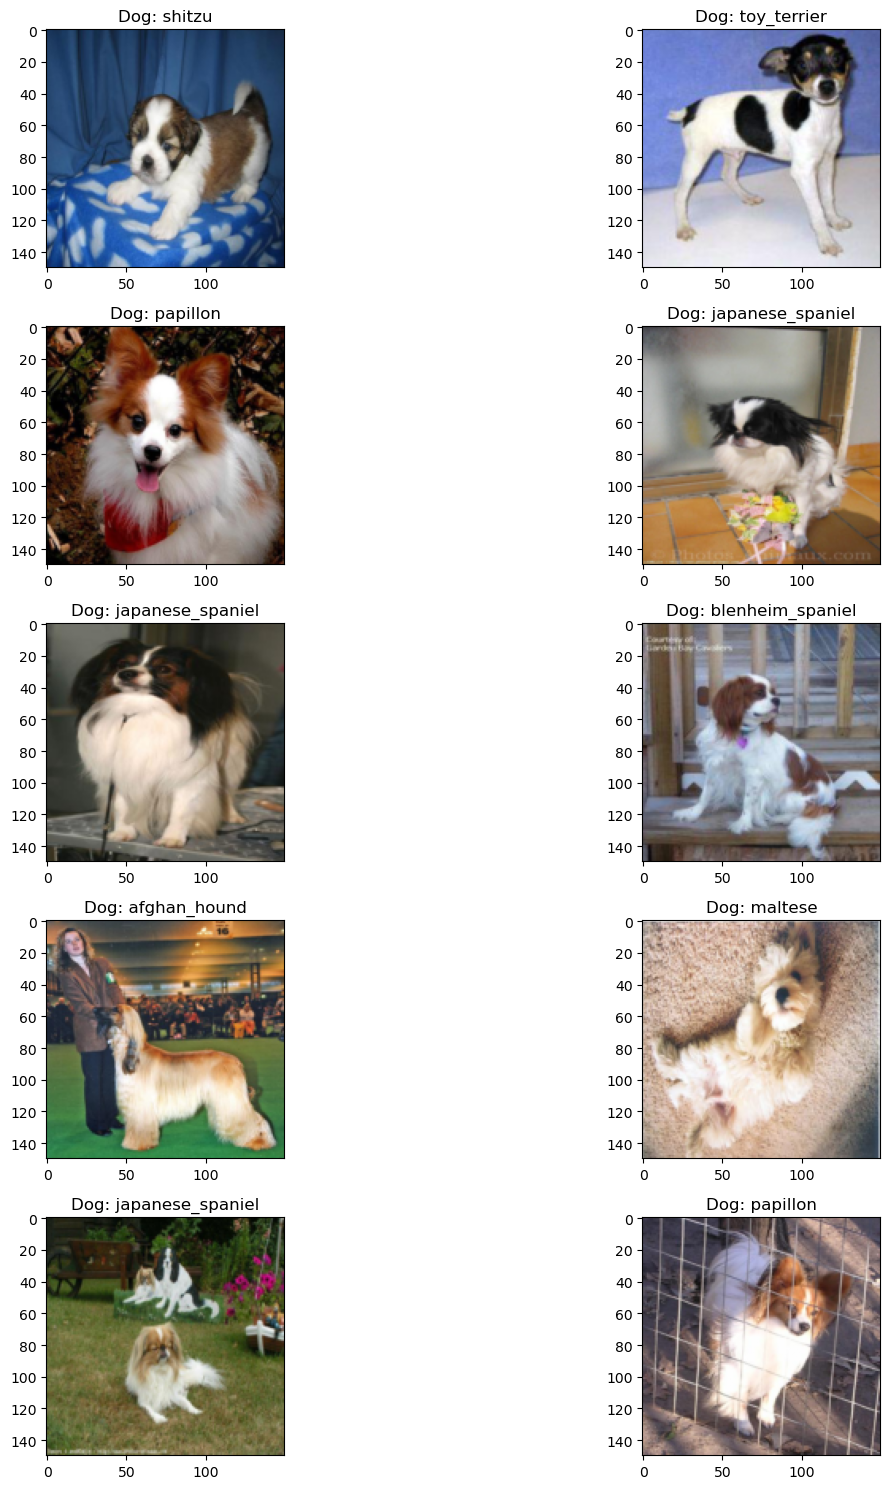

In [9]:
import matplotlib.pyplot as plt # 导入matplotlib
import random as rdm # 导入随机数工具
# 随机显示几张可爱的狗狗图片吧
fig,ax = plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        r = rdm.randint(0,len(X))
        img = X[r].transpose(1, 2, 0) #将图像通道从BGR调整为RGB，防止色彩失真
        ax[i,j].imshow(img)
        ax[i,j].set_title('Dog: '+y_label[r])
plt.tight_layout()

In [10]:
from sklearn.model_selection import train_test_split # 导入拆分工具
X_data = X.transpose(0, 2, 3, 1)
X_train,X_test,y_train,y_test = train_test_split(X_data, y, test_size=0.2,
                                                 random_state=0)
X_train.shape, y_train.shape

((1537, 150, 150, 3), (1537, 10))

In [11]:
from keras import layers # 导入所有层
from keras import models # 导入所有模型

cnn = models.Sequential() # 贯序模型
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', # 卷积
                        input_shape=(150, 150, 3)))
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化
# cnn.add(layers.Conv2D(64, (3, 3), activation='relu')) # 卷积
# cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化
# cnn.add(layers.Conv2D(128, (3, 3), activation='relu')) # 卷积
# cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化
# cnn.add(layers.Conv2D(128, (3, 3), activation='relu')) # 卷积
# cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化
cnn.add(layers.Flatten()) # 展平
cnn.add(layers.Dense(512, activation='relu')) # 全连接
cnn.add(layers.Dense(10, activation='softmax')) # 分类输出
cnn.compile(loss='categorical_crossentropy', # 损失函数
            optimizer='RMSprop', # 优化器
            metrics=['acc']) # 评估指标
cnn.summary()

/opt/miniconda3/envs/homl3/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 175232)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    89,719,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,725,322 (342.27 MB)

 Trainable params: 89,725,322 (342.27 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = cnn.fit(X_train, y_train, # 指定训练集
                    epochs=50,     # 指定轮次
                    batch_size=256, # 指定批量大小
                    validation_data=(X_test,y_test)) # 指定验证集

Epoch 1/50


**调整优化器**

In [11]:
from tensorflow.keras import optimizers # 导入优化器
cnn = models.Sequential() # 序贯模型
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', # 卷积
                       input_shape=(150, 150, 3))) 
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化
cnn.add(layers.Conv2D(64, (3, 3), activation='relu')) # 卷积
cnn.add(layers.Dropout(0.5)) # Dropout
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化
cnn.add(layers.Conv2D(128, (3, 3), activation='relu')) # 卷积
cnn.add(layers.Dropout(0.5)) # Dropout
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化
cnn.add(layers.Conv2D(256, (3, 3), activation='relu')) # 卷积
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化
cnn.add(layers.Flatten()) # 展平
cnn.add(layers.Dropout(0.5)) # Dropout
cnn.add(layers.Dense(512, activation='relu')) # 全连接
cnn.add(layers.Dense(10, activation='sigmoid')) # 分类输出
cnn.compile(loss='categorical_crossentropy', # 损失函数
            optimizer=optimizers.Adam(lr=1e-4), # 更新优化器并设定学习速率
            metrics=['acc']) # 评估指标
history = cnn.fit(X_train,y_train, # 指定训练集
                  epochs=50,     # 指定轮次
                  batch_size=256, # 指定批量大小
                  validation_data=(X_test,y_test)) # 指定验证集

**添加Dropout层**

In [12]:
cnn = models.Sequential() # 序贯模型
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', # 卷积
                       input_shape=(150, 150, 3))) 
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化
cnn.add(layers.Conv2D(64, (3, 3), activation='relu')) # 卷积
cnn.add(layers.Dropout(0.5)) # Dropout
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化
cnn.add(layers.Conv2D(128, (3, 3), activation='relu')) # 卷积
cnn.add(layers.Dropout(0.5)) # Dropout
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化
cnn.add(layers.Conv2D(256, (3, 3), activation='relu')) # 卷积
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化
cnn.add(layers.Flatten()) # 展平
cnn.add(layers.Dropout(0.5)) # Dropout
cnn.add(layers.Dense(512, activation='relu')) # 全连接
cnn.add(layers.Dense(10, activation='sigmoid')) # 分类输出
cnn.compile(loss='categorical_crossentropy', # 损失函数
            optimizer=optimizers.Adam(lr=1e-4), # 更新优化器并设定学习速率
            metrics=['acc']) # 评估指标
history = cnn.fit(X_train,y_train, # 指定训练集
                  epochs=50,     # 指定轮次
                  batch_size=256, # 指定批量大小
                  validation_data=(X_test,y_test)) # 指定验证集

**数据增强**

In [13]:
# 定义一个数据增强器，并设定各种增强选项
from keras.preprocessing.image import ImageDataGenerator
augs_gen = ImageDataGenerator(
           featurewise_center=False,
           samplewise_center=False,         
           featurewise_std_normalization=False,          
           samplewise_std_normalization=False,  
           zca_whitening=False, 
           rotation_range=10,  
           zoom_range = 0.1, 
           width_shift_range=0.2,  
           height_shift_range=0.2,
           horizontal_flip=True,  
           vertical_flip=False) 
augs_gen.fit(X_train) # 针对训练集拟合数据增强器

In [14]:
history = cnn.fit( # 使用fit_generator
    augs_gen.flow(X_train,y_train,batch_size=16), # 增强后的训练集
#     validation_data  = (X_test,y_test), # 指定验证集
#     validation_steps = 100, # 指定验证步长
    steps_per_epoch  = 100, # 指定每轮步长
    epochs = 50,  # 指定轮次
    verbose = 1) # 指定是否显示训练过程中的信息

In [15]:
from keras.models import load_model # 导入模型保存工具
cnn.save('../my_dog_cnn.h5')  # 创建一个HDF5格式的文件'my_dog_cnn.h5'
del cnn  # 删除当前模型
cnn = load_model('../my_dog_cnn.h5') # 重新载入已经保存的模型

** 绘制特征通道**

In [16]:
from keras.models import load_model # 导入模型保存工具
import matplotlib.pyplot as plt # 导入matplotlib
model = load_model('../my_dog_cnn.h5')# 载入刚才保存的模型
# 绘制特征通道
layer_outputs = [layer.output for layer in model.layers[:16]]
image = X_train[0]
image = image.reshape(1, 150, 150, 3)
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(image)
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 2], cmap='viridis')
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')